# Chapter 4 Exercises 1-5

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit as logistic
import arviz as az
import pymc3 as pm
np.random.seed(123)

## Exercise 1
***

In [23]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

varnames = ['α', 'β', 'bd']


In [24]:
for feature in ["sepal_length", "petal_width", "petal_length"]:

    x_n = feature
    x_0 = df[x_n].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        α = pm.Normal('α', mu=0, sd=10)
        β = pm.Normal('β', mu=0, sd=10)

        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} summary".format(feature))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1391.68draws/s]


Feature sepal_length summary
    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.31  0.32      0.00     -0.32       0.96  1731.0    1.0
β   5.40  1.00      0.02      3.55       7.43  1531.0    1.0
bd -0.06  0.06      0.00     -0.17       0.06  1788.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1170.33draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_width summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    0.61  1.83      0.06     -2.77       4.65  645.0    1.0
β   18.41  5.61      0.15      8.65      29.26  446.0    1.0
bd  -0.04  0.09      0.00     -0.22       0.13  814.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1104.36draws/s]
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.37  4.10      0.15     -3.53      12.31  582.0    1.0
β   12.98  5.64      0.08      3.76      23.78  371.0    1.0
bd  -0.28  0.28      0.01     -0.81       0.22  704.0    1.0


From the results we can see that bd variable HPD is the smallest with sepal length, and increases with petal_width, and petal_length.

## Exercise 2
***

In [25]:
for nu in [1,10, 30]:

    x_0 = df["petal_length"].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        # Priors have been changed
        α = pm.StudentT('α', nu=nu, mu=0, sd=10)
        β = pm.StudentT('β', nu=nu, mu=0, sd=10)


        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} nu {} summary".format(feature, nu))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:06<00:00, 442.69draws/s]
There were 660 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5723934984887481, but should be close to 0.8. Try to increase the number of tuning steps.
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


Feature petal_length nu 1 summary
      mean      sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α     4.95   13.41      1.15    -10.62      27.76  126.0   1.00
β   137.73  450.93     81.03      3.59     598.05   41.0   1.03
bd   -0.17    0.25      0.04     -0.73       0.17   49.0   1.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 879.48draws/s] 
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 10 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    4.03  4.56      0.14     -3.52      13.52  434.0    1.0
β   14.50  6.94      0.40      3.71      27.74  334.0    1.0
bd  -0.29  0.28      0.01     -0.83       0.18  543.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1032.88draws/s]
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 30 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.94  4.30      0.20     -2.79      13.68  327.0   1.00
β   14.01  5.98      0.38      4.00      25.55  369.0   1.01
bd  -0.28  0.28      0.01     -0.83       0.19  329.0   1.00


## Exercise 3
***

In [26]:
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    μ = α + pm.math.dot(x_c, β)

    yl = pm.Normal('yl', mu=μ, sd=sd, observed=y_0)
    trace_linear = pm.sample(1000)
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, β, α]
100%|██████████| 2000/2000 [00:01<00:00, 1088.84it/s]


    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.50  0.04       0.0      0.43       0.57  3075.0    1.0
β   0.57  0.05       0.0      0.46       0.67  3047.0    1.0
sd  0.35  0.02       0.0      0.30       0.40  2519.0    1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c28401ba8>],
      dtype=object)

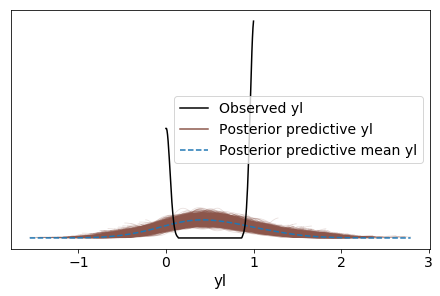

In [27]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data)

From the posterior predictive check this model is not very useful. We are trying to estimate the probability of a species given a sepal_length, but a number of the posterior predictive check values are below 0 and above 1. As is such the result cannot be interpreted as probability.

## Exercise 4
***

In [28]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values

In [29]:
with pm.Model() as model_1: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_1, β) 
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:17<00:00, 287.70draws/s]
The acceptance probability does not match the target. It is 0.8848631965762076, but should be close to 0.8. Try to increase the number of tuning steps.


In [30]:
varnames = ['α', 'β'] 
summary = az.summary(trace_1, var_names=varnames)
summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,-9.24,4.59,0.11,-17.84,-0.47,1504.0,1.0
β[0],4.71,0.88,0.03,3.03,6.34,1370.0,1.0
β[1],-5.22,1.01,0.02,-7.25,-3.56,1567.0,1.0


In [31]:
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)


log_odds_versicolor_f = (summary['mean'] * [1, x_1, x_2+1]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

(-5.219999999999999, -0.02387657278569843)

The value of -5.19 is consistent across the summary and our "hand check". A log odds value of -5.1 means that as $\beta_1$ increases, the probability that the species is versicolor decreases, or equivalently as sepal_width increases, the probability the flower is versicolor decreases.

We can verify with a quick plot

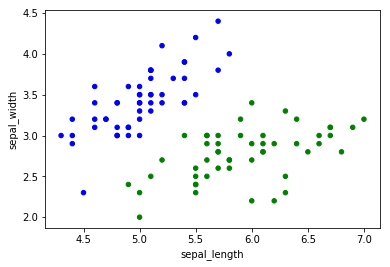

In [32]:
colors = df["species"].replace({'setosa':"blue", 'versicolor':"green"})
df.plot(kind="scatter", x="sepal_length", y="sepal_width", c=colors)

As sepal with increases from 3 to 4 we get farther from the green dots, reducing the probability that the flower were seeing is of the virginica species.

# Question 5
***

In [36]:
# Values for sepal length are directly added in the log_odds_line
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

for i in (0,1):
    log_odds_versicolor_i = (summary['mean'] * [1, x_1+i, x_2]).sum()
    probability_versicolor_i = logistic(log_odds_versicolor_i)


    log_odds_versicolor_f = (summary['mean'] * [1, x_1+i+1, x_2]).sum()
    probability_versicolor_f = logistic(log_odds_versicolor_f)

    print(f"""sepal_length_i {x_1+i}, sepal_length_f {x_1+i+1}
    Log Odds Change {log_odds_versicolor_f - log_odds_versicolor_i}
    Probability Change {probability_versicolor_f - probability_versicolor_i}
    """)

sepal_length_i 4.5, sepal_length_f 5.5
    Log Odds Change 4.709999999999999
    Probability Change 0.7080309252764029
    
sepal_length_i 5.5, sepal_length_f 6.5
    Log Odds Change 4.710000000000001
    Probability Change 0.26467417655124303
    


From from the calculation above we see that while the coefficient stays constant, as it should in linear regression, the probability change is not as large from 5.5 to 6.5 as it is from 4.5 to 5.5. Looking at the graphic this intuitively makes sense as well. In the region of sepal length of 4.5 to 5.5, it's hard to differentiate among the species. However when moving from a sepal length of 5.5 to 6.5, only the virginica species has sepal lengths in that range.